In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan

In [2]:
from __future__ import print_function
import torch

In [12]:
x = torch.Tensor(5,3)
print(x)


1.00000e-30 *
  5.5396  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000     nan  1.7688
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
[torch.FloatTensor of size 5x3]



In [13]:
x = torch.rand(5,3)
print(x)


 0.5401  0.2766  0.5027
 0.1770  0.0797  0.0189
 0.3931  0.6101  0.5889
 0.9596  0.2386  0.2924
 0.9013  0.8590  0.6409
[torch.FloatTensor of size 5x3]



In [14]:
x = torch.randn(5,3)
print(x)


-1.2600  0.4326 -0.1949
 0.7360 -0.5850  0.1914
-0.7246  0.4982 -0.2069
-0.7273  0.8081  0.5547
 0.0704  0.2190  2.4348
[torch.FloatTensor of size 5x3]



In [15]:
y = torch.randn(5,3)
print(x+y)


-2.7323  0.5047  0.0548
 2.8487 -1.1434  0.6939
-1.8856  0.1894  2.3714
-0.1879  1.7455  1.3095
 0.5978  0.4793  2.4466
[torch.FloatTensor of size 5x3]



In [16]:
print(torch.add(x,y))


-2.7323  0.5047  0.0548
 2.8487 -1.1434  0.6939
-1.8856  0.1894  2.3714
-0.1879  1.7455  1.3095
 0.5978  0.4793  2.4466
[torch.FloatTensor of size 5x3]



In [18]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [21]:
params = list(net.parameters())
print(len(params))
print(params[2].size())  # conv1's .weight

10
torch.Size([16, 6, 5, 5])


In [22]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
-0.0700  0.1405 -0.1397 -0.1198  0.1417  0.1103 -0.1583  0.1342  0.0237 -0.0322
[torch.FloatTensor of size 1x10]



In [23]:
# -*- coding: utf-8 -*-
import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 28495603.319597103
1 23587418.62302535
2 23904133.13983334
3 25721252.998801384
4 26071622.98155536
5 22943663.718483526
6 16929006.09518958
7 10595907.19718913
8 5969825.375450386
9 3280620.26791309
10 1888139.80144775
11 1189529.7827518247
12 827731.5616205337
13 625239.7683243948
14 499764.2940141358
15 413855.603263336
16 350063.201548612
17 299986.33408352843
18 259270.3263234866
19 225518.4672246622
20 197080.47751671576
21 172925.2303064546
22 152260.9421460025
23 134457.60302143716
24 119064.51146706726
25 105708.17009321065
26 94096.49611532333
27 83958.45127816664
28 75074.85774833565
29 67281.07580835756
30 60426.883879095265
31 54372.218543395895
32 49021.37605138187
33 44269.36749143871
34 40042.56751304327
35 36275.061222280594
36 32910.02635874275
37 29898.627627030204
38 27199.16254380063
39 24775.494004436387
40 22596.9223003612
41 20634.841229816382
42 18865.77065678616
43 17267.522863416314
44 15822.095286819265
45 14512.897297774227
46 13325.339309402694
47 12246.

439 4.683766186559811e-06
440 4.447893042405843e-06
441 4.223859264965733e-06
442 4.011107781008448e-06
443 3.809156227056876e-06
444 3.6173204089201577e-06
445 3.43514303603347e-06
446 3.2621516477719633e-06
447 3.097872570089805e-06
448 2.941917019446519e-06
449 2.793817249155175e-06
450 2.653167316799207e-06
451 2.5196165024664567e-06
452 2.3927578461863286e-06
453 2.272292575989483e-06
454 2.1578956780680967e-06
455 2.0492599718119427e-06
456 1.9461224523780304e-06
457 1.8481560001515111e-06
458 1.7551611368355768e-06
459 1.6668359292873272e-06
460 1.5829460545249755e-06
461 1.5032737868933846e-06
462 1.4276125582282336e-06
463 1.3557673821192947e-06
464 1.2875492441850113e-06
465 1.2227647423453073e-06
466 1.1612479853607845e-06
467 1.1028115347956726e-06
468 1.0473252112458604e-06
469 9.9463206201936e-07
470 9.445936869469102e-07
471 8.970695223656395e-07
472 8.519435153228799e-07
473 8.090968204308306e-07
474 7.683927123521955e-07
475 7.297362793667833e-07
476 6.930259205416593e

In [24]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 28193859.64223159
1 25611386.945621826
2 27075008.728513718
3 28873978.520313263
4 27598981.575502336
5 22252068.877271004
6 14782091.155571964
7 8498135.672209954
8 4581330.688628264
9 2538901.342084363
10 1539632.8847395768
11 1043112.1077338944
12 776988.2163409758
13 618368.2142815285
14 512811.2657655934
15 435718.6272992459
16 375838.4369582499
17 327463.46709958836
18 287321.38803018164
19 253467.41562612972
20 224589.13812180422
21 199737.7505721858
22 178223.49305263473
23 159524.35662703778
24 143210.57385730383
25 128892.9890412665
26 116271.13687417984
27 105112.01841002976
28 95216.37528935372
29 86410.99096153982
30 78557.32915536143
31 71533.69262306186
32 65240.90187013529
33 59582.83011312988
34 54487.02479677931
35 49892.874274219015
36 45746.750518085384
37 41998.097245557496
38 38599.379904267786
39 35513.21402800677
40 32705.507498918792
41 30146.961533435096
42 27812.215075739325
43 25679.61038443604
44 23731.149841117374
45 21953.974148039808
46 20327.571845478

468 9.559367351504033e-05
469 9.402327938771993e-05
470 9.259956666263225e-05
471 9.10015546379539e-05
472 8.936753345213655e-05
473 8.812161161633747e-05
474 8.691548009127914e-05
475 8.597140502181189e-05
476 8.429269385706872e-05
477 8.302454451031283e-05
478 8.176168196889766e-05
479 8.05429152984094e-05
480 7.931700686569787e-05
481 7.815532368482536e-05
482 7.67471787025964e-05
483 7.556346886457288e-05
484 7.468331638151027e-05
485 7.343006388071949e-05
486 7.234296495817194e-05
487 7.132828077234532e-05
488 7.043072461446198e-05
489 6.944383927727504e-05
490 6.871232639177327e-05
491 6.777405204144715e-05
492 6.693477657117308e-05
493 6.582234624685768e-05
494 6.48239655158811e-05
495 6.402356681003973e-05
496 6.309400502502172e-05
497 6.226752242162459e-05
498 6.154716835415908e-05
499 6.075275033624872e-05


In [30]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform,data
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [27]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


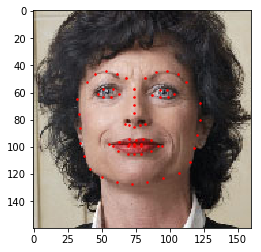

In [28]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),
               landmarks)
plt.show()

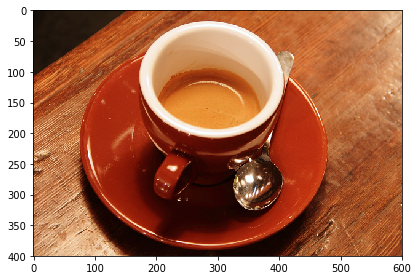

In [55]:
img = data.coffee()
img2 = io.imread(os.path.join('faces/', img_name))
io.imshow(img)

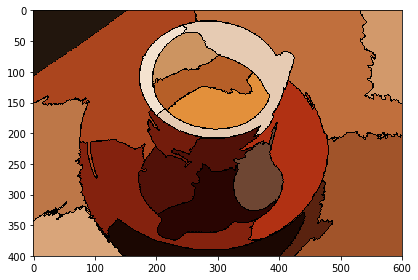

In [54]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])


img = data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=50)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()